# **Importing Libraries**


In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import joblib

# **Data Collection**

In [425]:
data = pd.read_csv("/content/diabetes.csv")

# **Exploratory Data Analysis(EDA)**


In [426]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [428]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: xlabel='Outcome'>

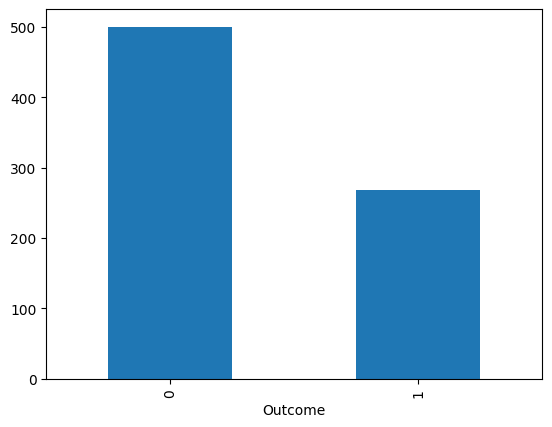

In [429]:
data['Outcome'].value_counts().plot(kind="bar")

In [430]:
print((data['Outcome']==0).sum())
print((data['Outcome']==1).sum())

500
268


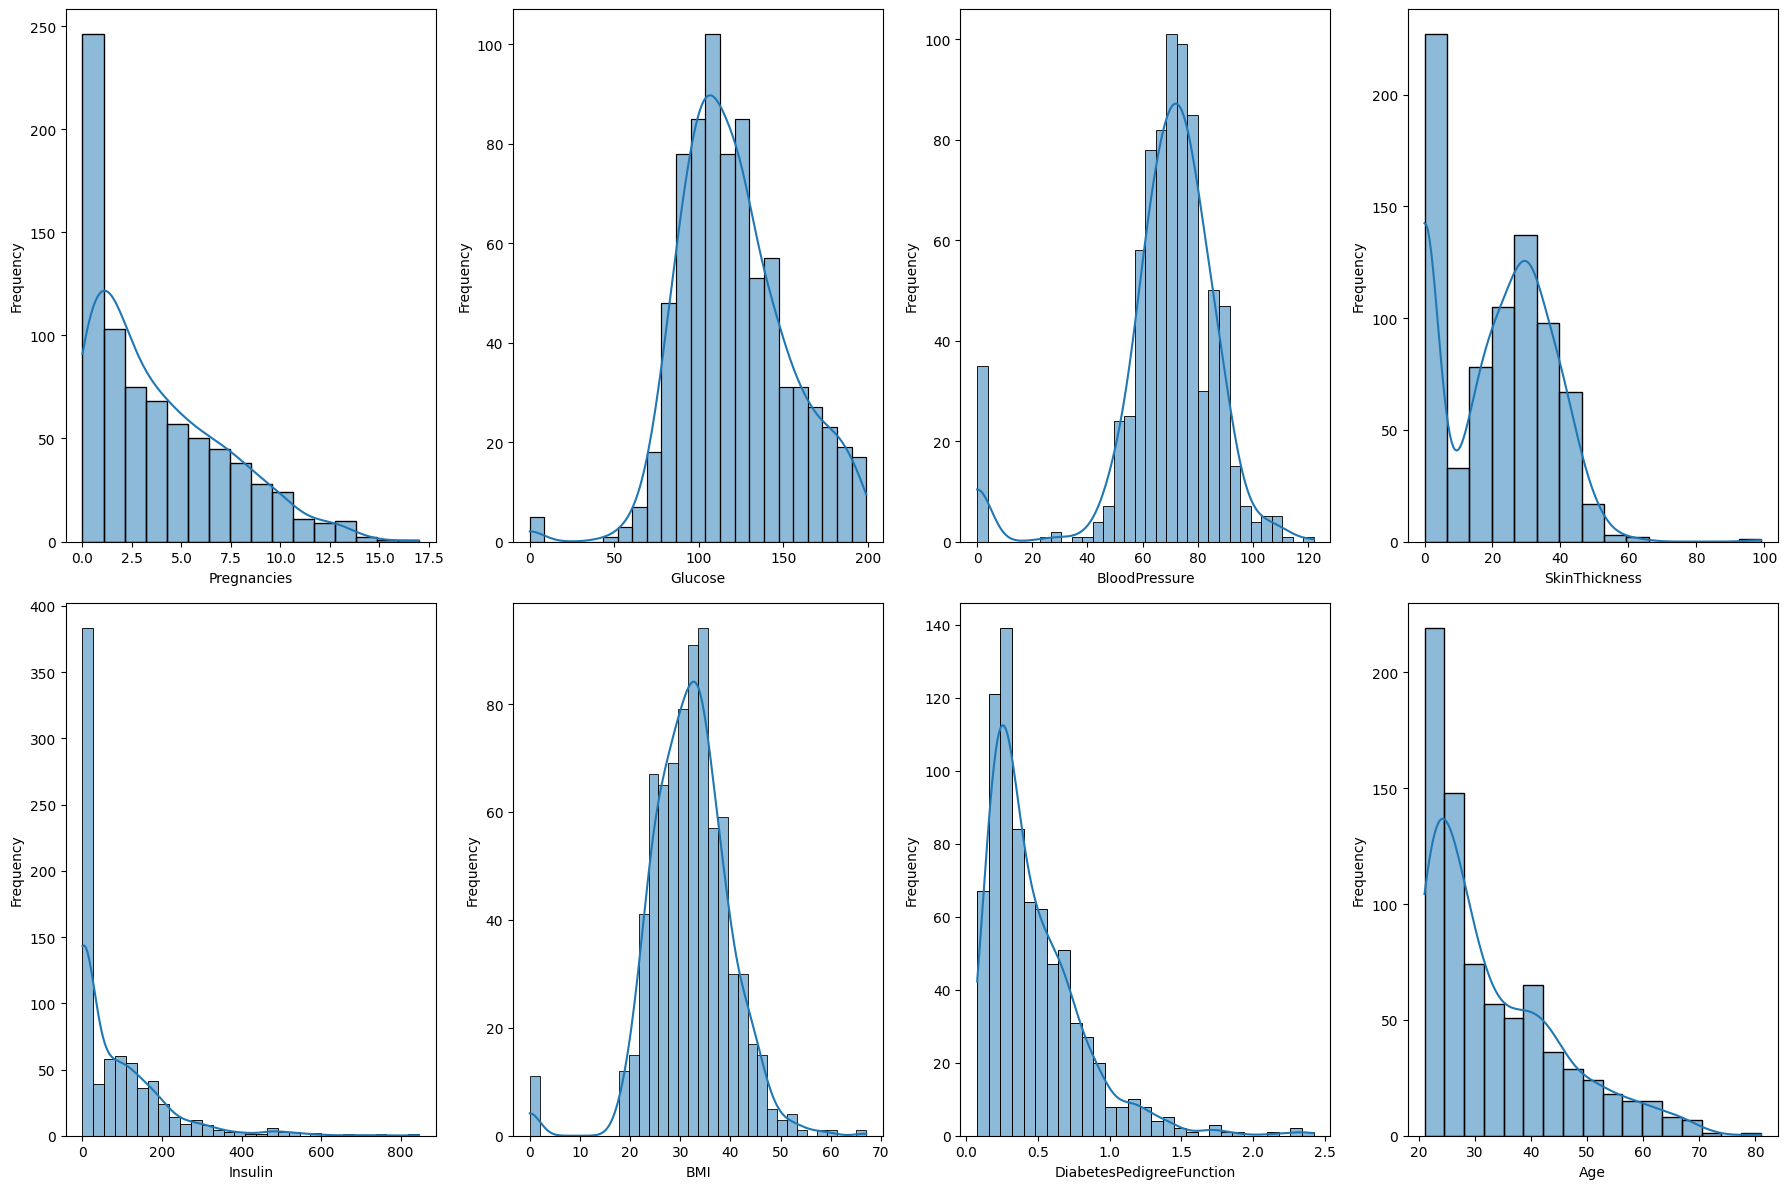

In [431]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
  sns.histplot(data=data, x=column, kde=True, ax=axes[i])
  axes[i].set_xlabel(column)
  axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

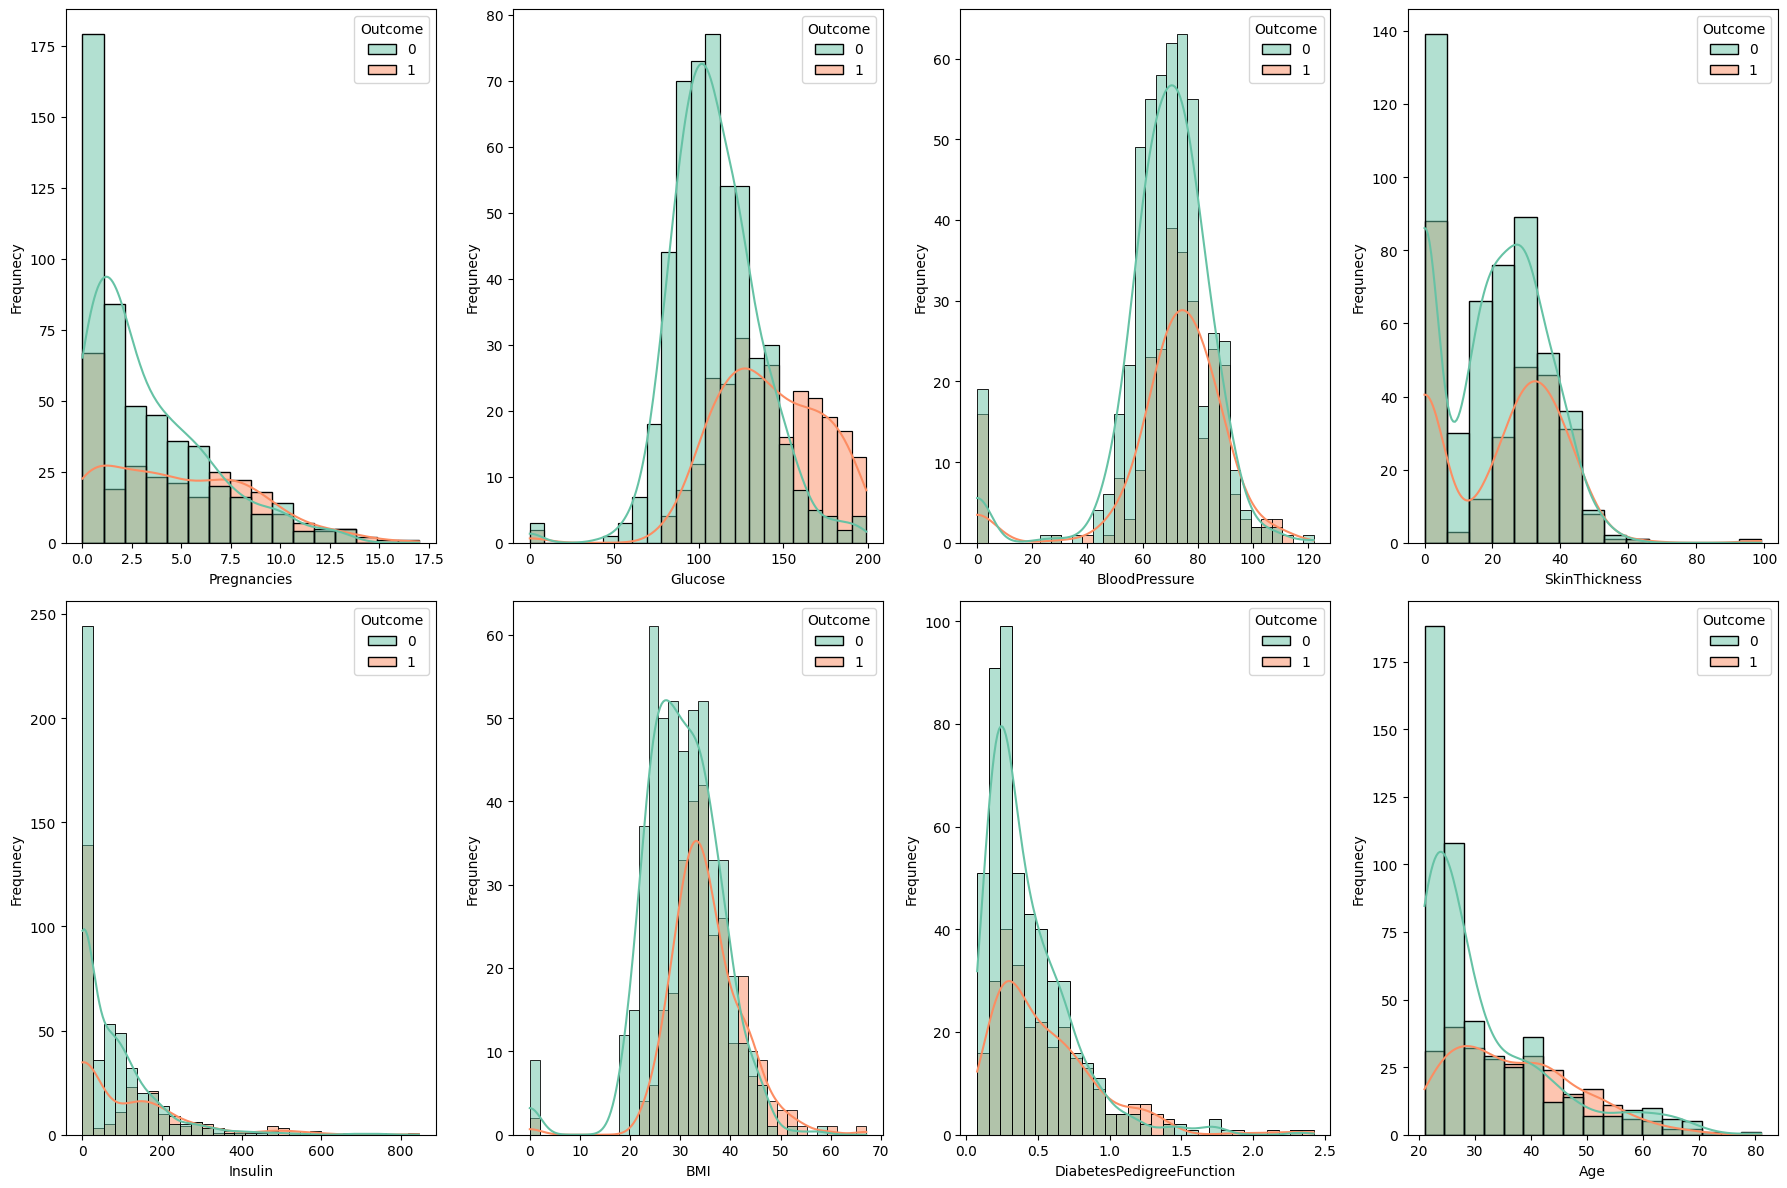

In [432]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
  sns.histplot(data=data, x=column, hue='Outcome', kde=True, ax=axes[i], palette='Set2')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel("Frequnecy")

plt.tight_layout()
plt.show()

In [433]:
(data['Glucose']==0).sum()

np.int64(5)

In [434]:
((data['Glucose']==0) & (data['Outcome']==1)).sum()

np.int64(2)

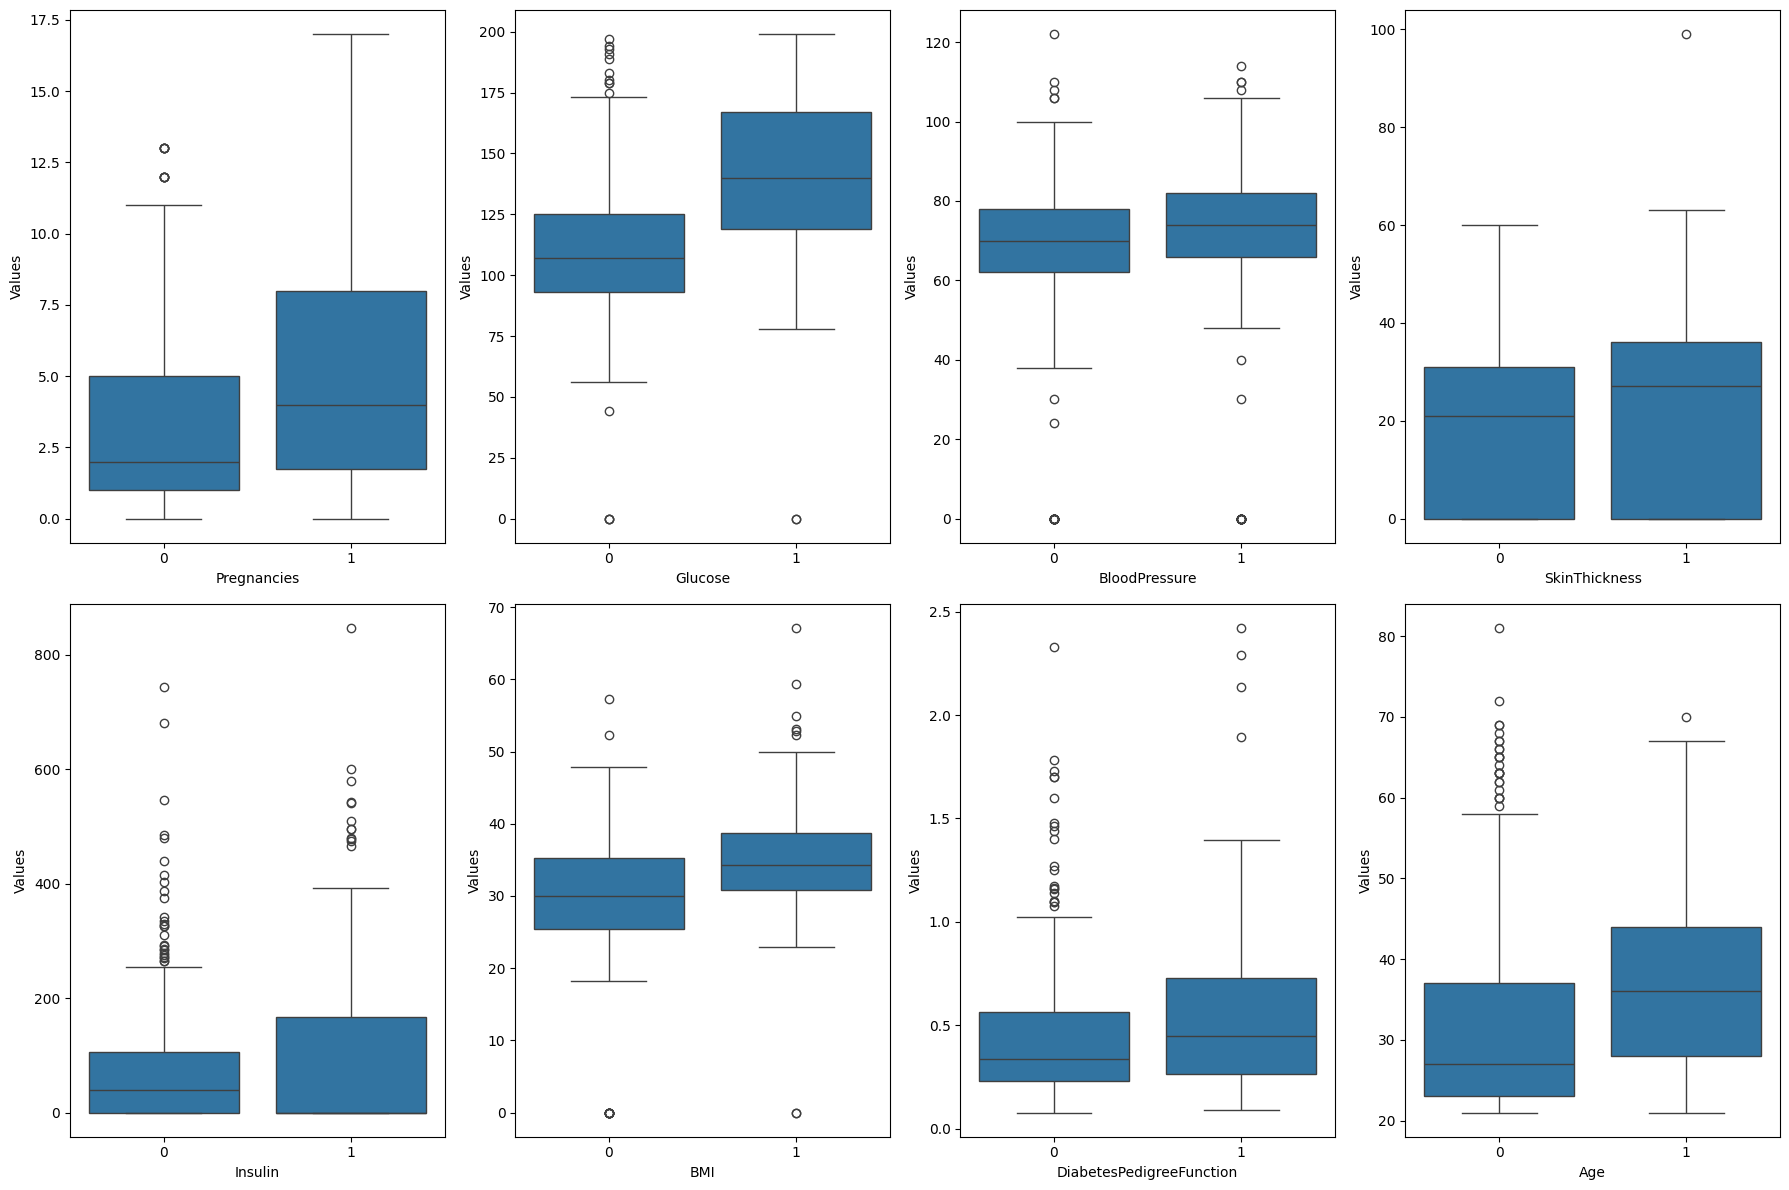

In [435]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
  sns.boxplot(x='Outcome', y=column, data=data, ax=axes[i])
  axes[i].set_xlabel(column)
  axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

Pregnancy ==> Right Skewed

Glucose ==> Right Skewed

Blood Pressure ==> Balanced

Skin Thickness ==> Left Skewed

Insulin ==> Highly imbalanced

BMI ==> Mostly Balaced

DPF ==> Right Skewed

Age ==> Balnced for 1 and Right Skewed for 0

In [436]:
(data['Insulin']==0).sum()

np.int64(374)

In [437]:
((data['Insulin']==0) & (data['Outcome']==1)).sum()

np.int64(138)

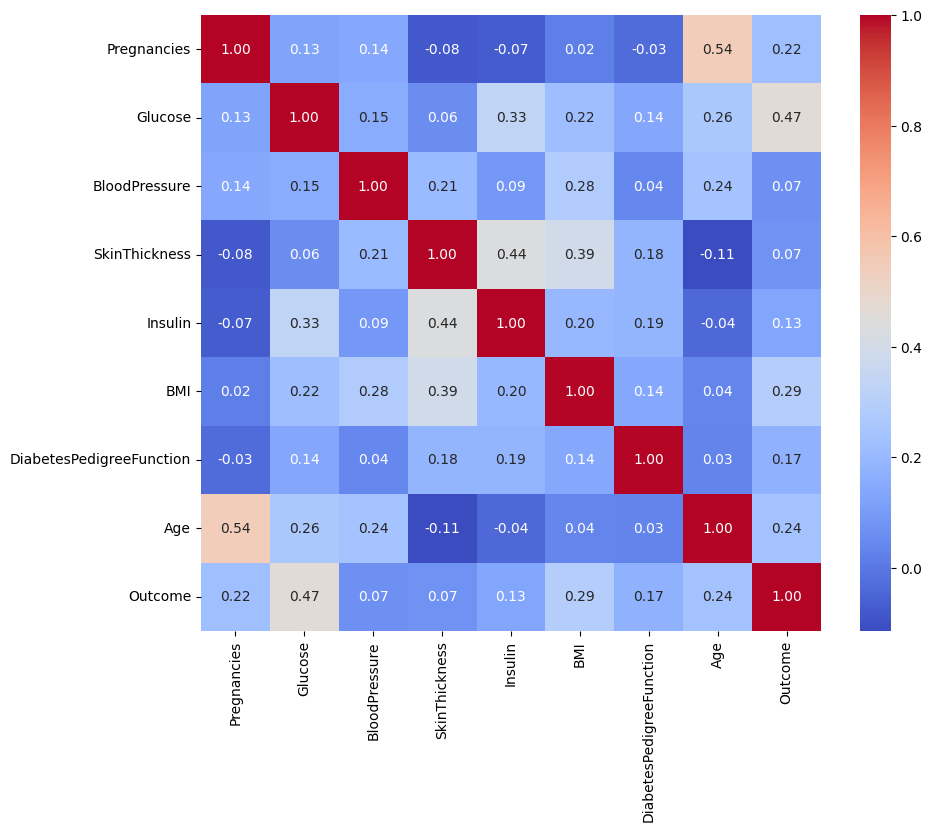

In [438]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Axes: >

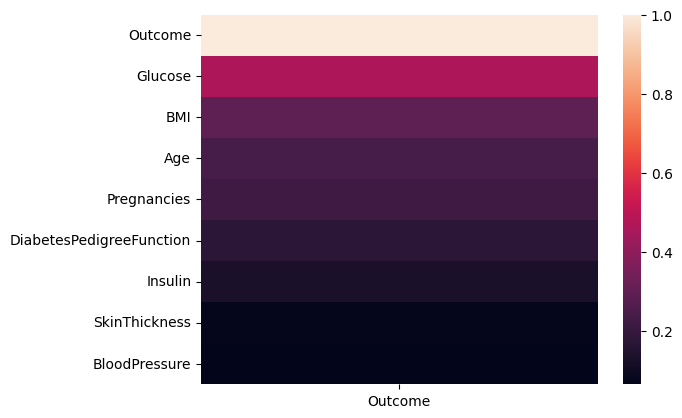

In [439]:
sns.heatmap(corr[['Outcome']].sort_values(by='Outcome', ascending=False))

# **Data Pre-processing**

In [440]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [441]:
# data.drop(columns="SkinThickness", inplace=True)

***Enriching Dataest***

In [442]:
col_zeroes = ['Glucose', 'BMI', 'SkinThickness', 'BloodPressure', 'Insulin']
for col in col_zeroes:
  data[col] = data[col].replace(0, np.nan)
  data.fillna(data[col].median(), inplace=True)

In [443]:
data['Age_Pregnancies'] = data['Age']*data['Pregnancies']

In [444]:
data['BMI_Glucose'] = data['BMI']*data['Glucose']

In [445]:
data['Glucose_per_BMI'] = data['Glucose']/(data['BMI'])

In [446]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Pregnancies,BMI_Glucose,Glucose_per_BMI
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,300,4972.8,4.404762
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,31,2261.0,3.195489
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,256,4263.9,7.854077
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21,2500.9,3.167260
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,5904.7,3.178654
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,630,3322.9,3.069909
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,54,4489.6,3.315217
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,150,3170.2,4.618321
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1,47,3792.6,4.186047


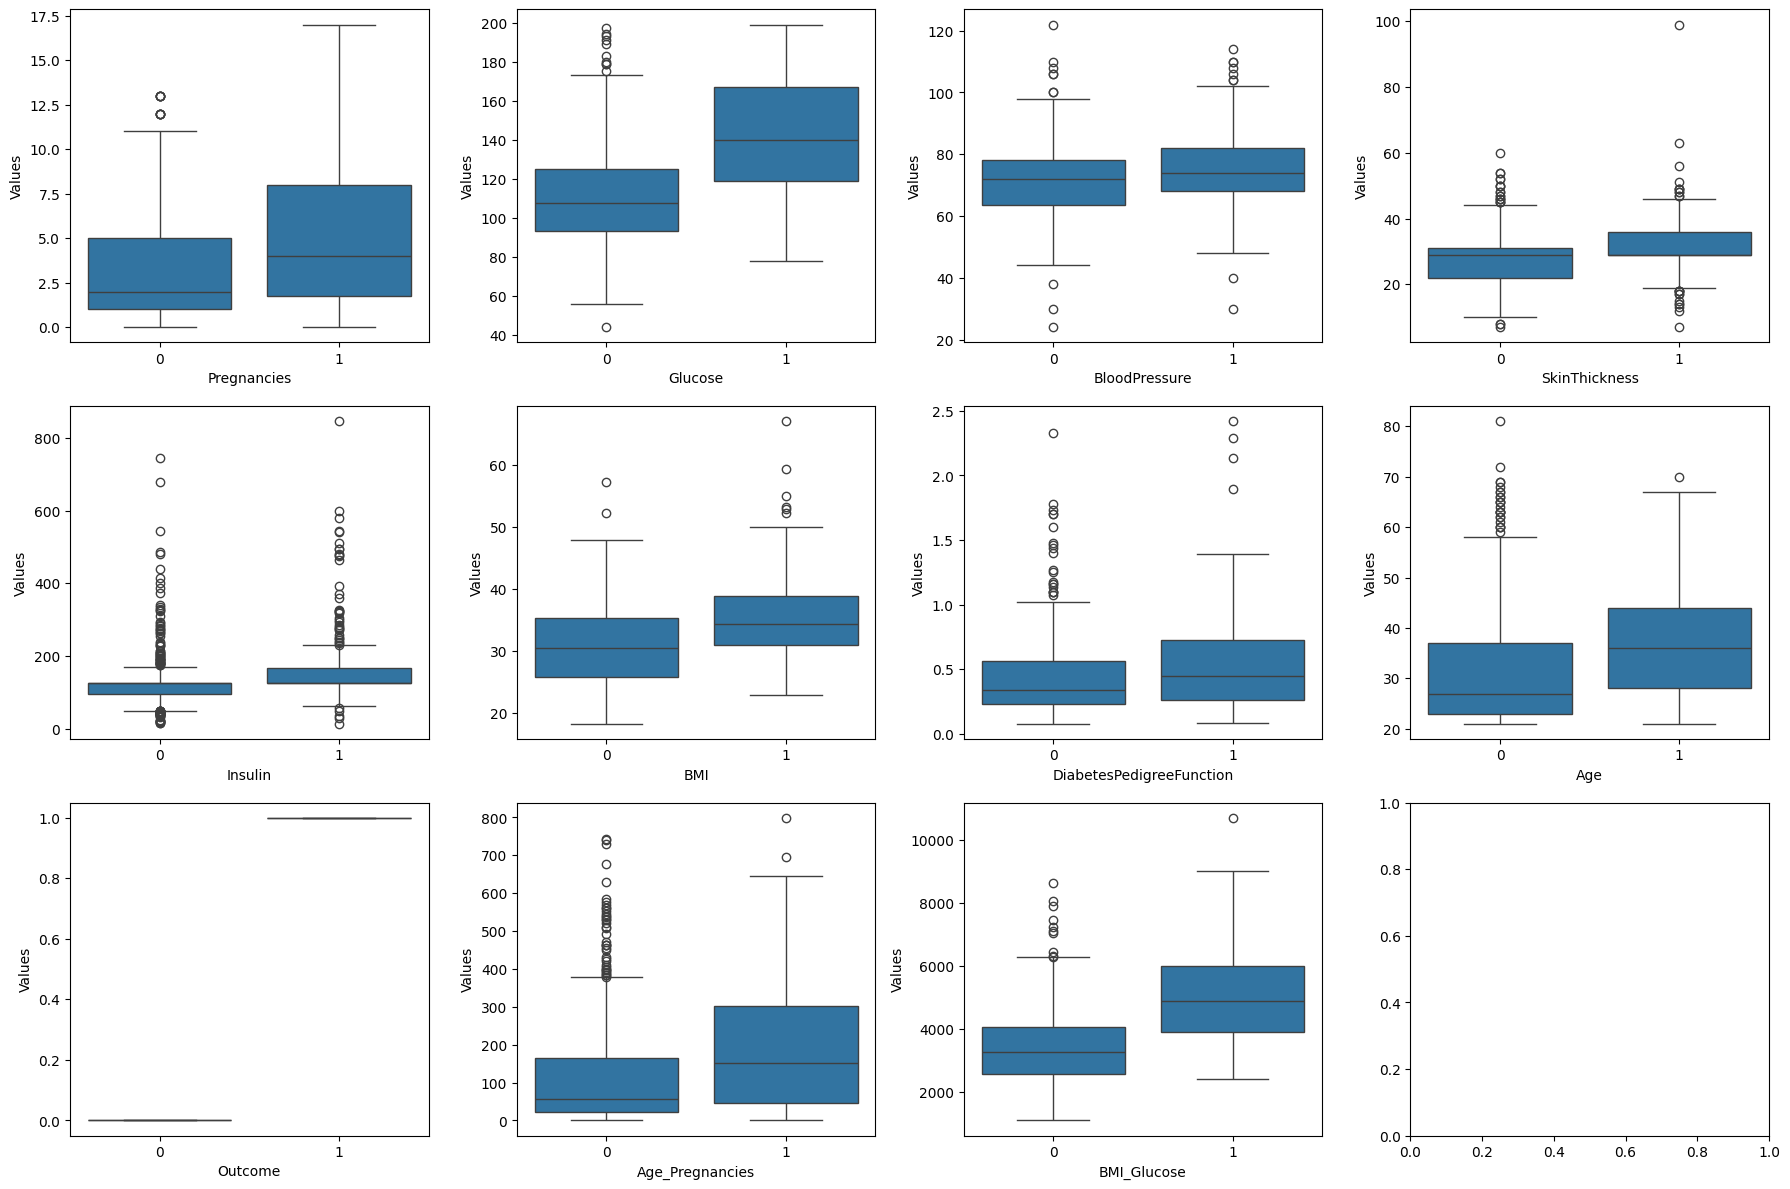

In [447]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
  sns.boxplot(x='Outcome', y=column, data=data, ax=axes[i])
  axes[i].set_xlabel(column)
  axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [448]:
data['Insulin'] = np.log1p(data['Insulin'])

In [449]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Pregnancies,BMI_Glucose,Glucose_per_BMI
0,6,148.0,72.0,35.0,4.836282,33.6,0.627,50,1,300,4972.8,4.404762
1,1,85.0,66.0,29.0,4.836282,26.6,0.351,31,0,31,2261.0,3.195489
2,8,183.0,64.0,29.0,4.836282,23.3,0.672,32,1,256,4263.9,7.854077
3,1,89.0,66.0,23.0,4.553877,28.1,0.167,21,0,21,2500.9,3.167260
4,0,137.0,40.0,35.0,5.129899,43.1,2.288,33,1,0,5904.7,3.178654
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,5.198497,32.9,0.171,63,0,630,3322.9,3.069909
764,2,122.0,70.0,27.0,4.836282,36.8,0.340,27,0,54,4489.6,3.315217
765,5,121.0,72.0,23.0,4.727388,26.2,0.245,30,0,150,3170.2,4.618321
766,1,126.0,60.0,29.0,4.836282,30.1,0.349,47,1,47,3792.6,4.186047


<Axes: xlabel='Outcome', ylabel='Insulin'>

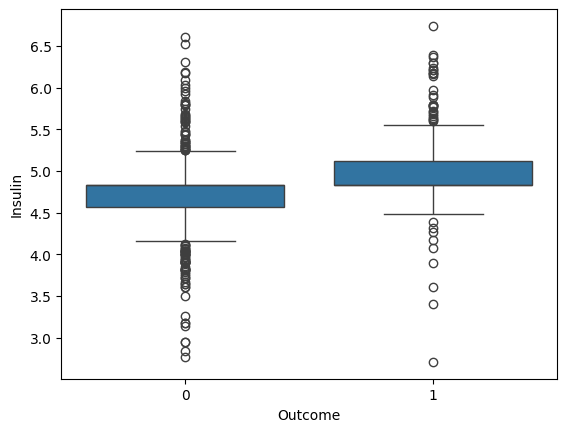

In [450]:
sns.boxplot(x='Outcome', y = 'Insulin', data=data)

In [451]:
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Insulin'] >= lower_bound) & (data['Insulin'] <= upper_bound)]
print(len(data))

422


<Axes: xlabel='Outcome', ylabel='BMI'>

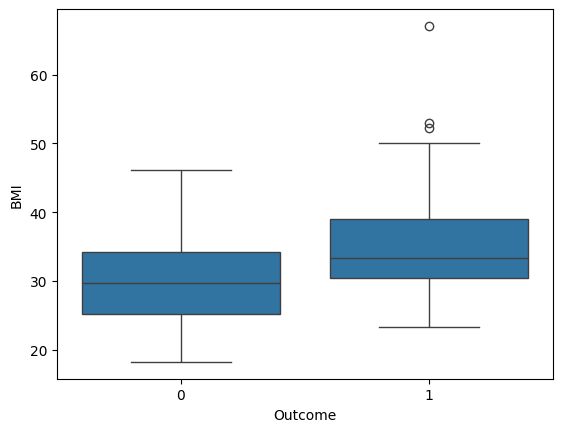

In [452]:
sns.boxplot(x="Outcome", y="BMI", data=data)

<Axes: xlabel='Outcome', ylabel='Glucose'>

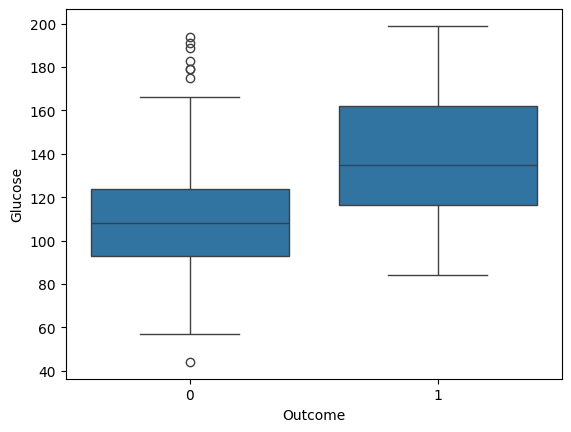

In [453]:
sns.boxplot(x="Outcome", y="Glucose", data=data)

# **Feature Engineering**

In [454]:
x = data.drop(columns="Outcome")
y = data[["Outcome"]]

In [455]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [500]:
print("Insulin Min:", scaler.data_min_[4])
print("Insulin Max:", scaler.data_max_[4])


Insulin Min: 4.74493212836325
Insulin Max: 4.912654885736052


Applying SMOTE (Synthetic Minority Over-Sampling Technique)

In [456]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [457]:
# x_df = pd.DataFrame(x, columns=data.drop(columns="Outcome").columns)
x_df = pd.DataFrame(x,columns=data.drop(columns="Outcome").columns)
x_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_Pregnancies,BMI_Glucose,Glucose_per_BMI
0,0.352941,0.670968,0.404762,0.296703,0.544647,0.314928,0.302479,0.568627,0.375469,0.489905,0.431760
1,0.058824,0.264516,0.333333,0.230769,0.544647,0.171779,0.150413,0.196078,0.038798,0.146865,0.253304
2,0.470588,0.896774,0.309524,0.230769,0.544647,0.104294,0.327273,0.215686,0.320401,0.400230,0.940787
3,0.294118,0.464516,0.428571,0.230769,0.544647,0.151329,0.067769,0.176471,0.187735,0.236503,0.450427
4,0.588235,0.458065,0.404762,0.230769,0.544647,0.349693,0.030854,0.156863,0.362954,0.374374,0.262498
...,...,...,...,...,...,...,...,...,...,...,...
521,0.411765,0.967894,0.607284,0.238009,0.544647,0.427235,0.196798,0.392157,0.359199,0.821210,0.514760
522,0.409549,0.748873,0.377366,0.230769,0.544647,0.128024,0.064287,0.587497,0.446531,0.356076,0.747742
523,0.294118,0.537992,0.506046,0.230769,0.544647,0.401466,0.453328,0.306411,0.229205,0.472319,0.279724
524,0.112850,0.377087,0.566574,0.304556,0.313073,0.548109,0.030390,0.039216,0.055224,0.443404,0.119488


# **Model Training**

In [458]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [459]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [460]:
model_knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
model_knn.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [461]:
model_svm = SVC(kernel = "linear")
model_svm.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [462]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

# **Model Evalutaion**

In [463]:
y_pred_lr = model_lr.predict(x_test)
y_pred_lr

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [464]:
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [465]:
y_pred_svm = model_svm.predict(x_test)
y_pred_svm

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [466]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [467]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.6415094339622641

In [468]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.7358490566037735

In [469]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm

0.6509433962264151

In [470]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.7547169811320755

In [471]:
precision_lr = precision_score(y_test, y_pred_lr)
precision_lr

0.8

In [472]:
precision_knn = precision_score(y_test, y_pred_knn)
precision_knn

0.7761194029850746

In [473]:
precision_svm = precision_score(y_test, y_pred_svm)
precision_svm

0.8181818181818182

In [474]:
precision_rf = precision_score(y_test, y_pred_rf)
precision_rf

0.819672131147541

In [475]:
recall_lr = recall_score(y_test, y_pred_lr)
recall_lr

0.5538461538461539

In [476]:
recall_knn = recall_score(y_test, y_pred_knn)
recall_knn

0.8

In [477]:
recall_svm = recall_score(y_test, y_pred_svm)
recall_svm

0.5538461538461539

In [478]:
recall_rf = recall_score(y_test, y_pred_rf)
recall_rf

0.7692307692307693

In [479]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_lr

array([[32,  9],
       [29, 36]])

In [480]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_knn

array([[26, 15],
       [13, 52]])

In [481]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_svm

array([[33,  8],
       [29, 36]])

In [482]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_rf

array([[30, 11],
       [15, 50]])

In [483]:
f1_score_lr = f1_score(y_test, y_pred_lr)
f1_score_lr

0.6545454545454545

In [484]:
f1_score_knn = f1_score(y_test, y_pred_knn)
f1_score_knn

0.7878787878787878

In [485]:
f1_score_svm = f1_score(y_test, y_pred_svm)
f1_score_svm

0.6605504587155964

In [486]:
f1_score_rf = f1_score(y_test, y_pred_rf)
f1_score_rf

0.7936507936507936

In [487]:
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
roc_auc_lr

np.float64(0.6671669793621013)

In [488]:
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
roc_auc_knn

np.float64(0.7170731707317074)

In [489]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
roc_auc_svm

np.float64(0.6793621013133209)

In [490]:
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_rf

np.float64(0.7504690431519699)

In [491]:
x_df = pd.DataFrame(x, columns=data.drop(columns="Outcome").columns)
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,526.0,0.258799,0.198649,0.0,0.109236,0.235294,0.411765,1.0
Glucose,526.0,0.520078,0.193702,0.0,0.387098,0.490323,0.632780,1.0
BloodPressure,526.0,0.429719,0.130918,0.0,0.357143,0.404828,0.500000,1.0
SkinThickness,526.0,0.234821,0.075684,0.0,0.230769,0.230769,0.230769,1.0
Insulin,526.0,0.542552,0.100578,0.0,0.544647,0.544647,0.544647,1.0
BMI,526.0,0.290778,0.135467,0.0,0.194274,0.282323,0.361963,1.0
DiabetesPedigreeFunction,526.0,0.193691,0.161046,0.0,0.083884,0.137331,0.270287,1.0
Age,526.0,0.291181,0.240989,0.0,0.078431,0.235294,0.431373,1.0
Age_Pregnancies,526.0,0.217896,0.197282,0.0,0.055069,0.166395,0.359199,1.0
BMI_Glucose,526.0,0.377419,0.180730,0.0,0.245443,0.348435,0.491098,1.0


In [492]:
for k in [3, 5, 7, 9, 11]:
    for metric in ['euclidean', 'manhattan']:
        for w in ['uniform', 'distance']:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=w)
            knn.fit(x_train, y_train)
            y_pred = knn.predict(x_test)

            # Evaluate key metrics
            auccracy=accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])

            print(f'k={k}, metric={metric}, weights={w}, Recall={recall:.3f}, F1={f1:.3f}, AUC={auc:.3f}')


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

k=3, metric=euclidean, weights=uniform, Recall=0.738, F1=0.774, AUC=0.778
k=3, metric=euclidean, weights=distance, Recall=0.754, F1=0.784, AUC=0.792
k=3, metric=manhattan, weights=uniform, Recall=0.769, F1=0.775, AUC=0.775
k=3, metric=manhattan, weights=distance, Recall=0.785, F1=0.785, AUC=0.796
k=5, metric=euclidean, weights=uniform, Recall=0.754, F1=0.772, AUC=0.763
k=5, metric=euclidean, weights=distance, Recall=0.785, F1=0.785, AUC=0.792
k=5, metric=manhattan, weights=uniform, Recall=0.738, F1=0.762, AUC=0.782
k=5, metric=manhattan, weights=distance, Recall=0.815, F1=0.809, AUC=0.808


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

k=7, metric=euclidean, weights=uniform, Recall=0.738, F1=0.750, AUC=0.758
k=7, metric=euclidean, weights=distance, Recall=0.800, F1=0.788, AUC=0.789
k=7, metric=manhattan, weights=uniform, Recall=0.677, F1=0.721, AUC=0.791
k=7, metric=manhattan, weights=distance, Recall=0.769, F1=0.781, AUC=0.822
k=9, metric=euclidean, weights=uniform, Recall=0.708, F1=0.742, AUC=0.783
k=9, metric=euclidean, weights=distance, Recall=0.785, F1=0.797, AUC=0.809
k=9, metric=manhattan, weights=uniform, Recall=0.662, F1=0.711, AUC=0.797
k=9, metric=manhattan, weights=distance, Recall=0.769, F1=0.781, AUC=0.824
k=11, metric=euclidean, weights=uniform, Recall=0.723, F1=0.740, AUC=0.779
k=11, metric=euclidean, weights=distance, Recall=0.769, F1=0.775, AUC=0.812
k=11, metric=manhattan, weights=uniform, Recall=0.662, F1=0.717, AUC=0.781
k=11, metric=manhattan, weights=distance, Recall=0.769, F1=0.787, AUC=0.822


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [493]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
knn.fit(x_train, y_train)

y_probs = knn.predict_proba(x_test)[:, 1]  # probabilities for positive class

thresholds = [i/100 for i in range(20, 80, 5)]  # 0.20 to 0.75 in steps of 0.05

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    f = f1_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Precision={p:.3f} | Recall={r:.3f} | F1={f:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Threshold=0.20 | Precision=0.718 | Recall=0.938 | F1=0.813
Threshold=0.25 | Precision=0.714 | Recall=0.923 | F1=0.805
Threshold=0.30 | Precision=0.759 | Recall=0.923 | F1=0.833
Threshold=0.35 | Precision=0.756 | Recall=0.908 | F1=0.825
Threshold=0.40 | Precision=0.776 | Recall=0.908 | F1=0.837
Threshold=0.45 | Precision=0.775 | Recall=0.846 | F1=0.809
Threshold=0.50 | Precision=0.776 | Recall=0.800 | F1=0.788
Threshold=0.55 | Precision=0.790 | Recall=0.754 | F1=0.772
Threshold=0.60 | Precision=0.800 | Recall=0.677 | F1=0.733
Threshold=0.65 | Precision=0.804 | Recall=0.631 | F1=0.707
Threshold=0.70 | Precision=0.837 | Recall=0.554 | F1=0.667
Threshold=0.75 | Precision=0.865 | Recall=0.492 | F1=0.627


# **Model Training**

In [498]:
print("Scaler was fit on:", scaler.feature_names_in_)
print("Current input columns:", x_df.columns.tolist())

Scaler was fit on: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Age_Pregnancies' 'BMI_Glucose'
 'Glucose_per_BMI']
Current input columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Age_Pregnancies', 'BMI_Glucose', 'Glucose_per_BMI']


In [503]:
input_data =[1, 95, 70, 22, 90, 23.5, 0.25, 29]
pregnancies, glucose, bp, skin, insulin, bmi, dpf, age = input_data
row = np.array([[pregnancies, glucose, bp, skin, np.log(insulin), bmi, dpf, age,age*pregnancies, bmi*glucose, glucose/bmi ]])
scaled_row = scaler.transform(row)
print(scaled_row)
prob = model_knn.predict_proba(scaled_row)[:, 1]
prediction = model_knn.predict(scaled_row)
print(np.bincount(y_pred))
print("Probability of Diabetes:", prob[0])
print("Predicted Class:", "Diabetic" if prediction[0]==1 else "Non-Diabetic")

[[ 0.05882353  0.32903226  0.38095238  0.15384615 -1.46147405  0.10838446
   0.09476584  0.15686275  0.03629537  0.14326013  0.37830794]]
[44 62]
Probability of Diabetes: 0.27872579094667405
Predicted Class: Non-Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [513]:
test_data = [
    # --- Non-Diabetic (clear) ---
    [0, 85, 66, 29, 0, 26.6, 0.35, 31],
    [1, 90, 70, 25, 80, 22.5, 0.15, 25],
    [2, 95, 72, 27, 100, 23.0, 0.25, 29],
    [0, 88, 64, 20, 70, 24.1, 0.20, 22],
    [1, 92, 68, 22, 85, 24.9, 0.28, 27],

    # --- Boundary (uncertain) ---
    [2, 120, 75, 30, 90, 28.5, 0.45, 35],
    [3, 130, 78, 25, 110, 30.1, 0.55, 40],
    [1, 125, 80, 29, 100, 29.5, 0.60, 38],
    [4, 135, 82, 33, 120, 31.2, 0.58, 42],
    [0, 118, 76, 28, 88, 27.8, 0.40, 36],

    # --- Diabetic (clear) ---
    [6, 165, 82, 25, 130, 35.0, 0.80, 55],
    [8, 175, 90, 35, 200, 38.0, 0.90, 60],
    [5, 160, 85, 30, 150, 36.5, 0.84, 50],
    [10, 190, 92, 40, 250, 42.0, 1.10, 65],
    [7, 185, 88, 32, 210, 39.8, 0.95, 58],

    # --- Mild/controlled (near non-diabetic) ---
    [3, 110, 72, 25, 90, 28.0, 0.40, 34],
    [2, 108, 74, 24, 95, 27.5, 0.33, 32],
    [4, 125, 78, 30, 100, 30.0, 0.50, 39],
    [5, 145, 82, 29, 120, 31.8, 0.55, 45],
    [6, 155, 88, 33, 140, 34.5, 0.72, 52]
]

i=0

for input_row in test_data:
    row = input_row
    pregnancies, glucose, bp, skin, insulin, bmi, dpf, age = row
    row = np.array([[pregnancies, glucose, bp, skin, np.log(insulin+1e-6), bmi, dpf, age,age*pregnancies, bmi*glucose, glucose/(bmi+1e-6) ]])
    scaled_row = scaler.transform(row)
    prob = model_knn.predict_proba(scaled_row)[:, 1]
    prediction = model_knn.predict(scaled_row)
    i+=1
    print(i, "Probability of Diabetes:", prob[0], " ----- ","Predicted Class:", "Diabetic" if prediction[0]==1 else "Non-Diabetic")

1 Probability of Diabetes: 0.28577778344647864  -----  Predicted Class: Non-Diabetic
2 Probability of Diabetes: 0.28279002111881446  -----  Predicted Class: Non-Diabetic
3 Probability of Diabetes: 0.2735226724313233  -----  Predicted Class: Non-Diabetic
4 Probability of Diabetes: 0.14401835185920323  -----  Predicted Class: Non-Diabetic
5 Probability of Diabetes: 0.14493428504580838  -----  Predicted Class: Non-Diabetic
6 Probability of Diabetes: 0.2866047140060436  -----  Predicted Class: Non-Diabetic
7 Probability of Diabetes: 0.29761908990152053  -----  Predicted Class: Non-Diabetic
8 Probability of Diabetes: 0.27899416266623694  -----  Predicted Class: Non-Diabetic
9 Probability of Diabetes: 0.7032754846139191  -----  Predicted Class: Diabetic
10 Probability of Diabetes: 0.2812906904343289  -----  Predicted Class: Non-Diabetic
11 Probability of Diabetes: 1.0  -----  Predicted Class: Diabetic
12 Probability of Diabetes: 0.7095949765478532  -----  Predicted Class: Diabetic
13 Probabi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/valida

# **Model Deployment**

In [514]:
joblib.dump(model_knn, "diabetes_model.pkl")

['diabetes_model.pkl']